In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#import the dataset from co-lab

dataset = pd.read_csv('RainfallDataset.csv')


In [9]:
dataset

,Month,Inflow,Discharge,Precipitation,ActualEavapotranspiration,MaxTemperature,MinTemperature,WaterLevel,WeatherType
0,1,73.975000,15.829290,75.4319,99.8291,29.9876,23.1296,233.6253,0
1,2,50.119350,2.735324,172.6221,138.3366,31.0350,24.2791,234.2650,0
2,3,35.663330,20.911330,80.7324,118.4768,32.4573,24.6901,234.5127,0
3,4,30.129030,32.058390,113.6901,126.9770,31.7049,24.8354,230.8205,0
4,5,1.500000,36.012000,44.9202,110.2216,32.7028,23.7491,224.2406,2
...,...,...,...,...,...,...,...,...,...
274,275,4.087097,45.713630,49.2535,108.9538,33.6993,24.7009,249.8516,2
275,276,47.493330,5.565667,133.9437,137.2904,32.5995,23.9967,244.7567,0
276,277,151.838700,11.068950,272.2746,117.3843,30.4556,22.7538,245.5323,3
277,278,203.130000,23.418250,366.0023,100.3045,29.3491,22.8498,252.7933,1


In [13]:
X = dataset.iloc[:,1:8].values
Y = dataset.iloc[:,8].values

In [18]:
#X = np.delete(X,8,axis=1)

In [20]:
#X= np.delete(X,0,axis=1)

In [15]:
print(X[:5])

[[ 73.975     15.82929   75.4319    99.8291    29.9876    23.1296
  233.6253  ]
 [ 50.11935    2.735324 172.6221   138.3366    31.035     24.2791
  234.265   ]
 [ 35.66333   20.91133   80.7324   118.4768    32.4573    24.6901
  234.5127  ]
 [ 30.12903   32.05839  113.6901   126.977     31.7049    24.8354
  230.8205  ]
 [  1.5       36.012     44.9202   110.2216    32.7028    23.7491
  224.2406  ]]


In [17]:
print(Y[:5])

[0 0 0 0 2]


In [19]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
print(X[:5])

[[ 73.975     15.82929   75.4319    99.8291    29.9876    23.1296
  233.6253  ]
 [ 50.11935    2.735324 172.6221   138.3366    31.035     24.2791
  234.265   ]
 [ 35.66333   20.91133   80.7324   118.4768    32.4573    24.6901
  234.5127  ]
 [ 30.12903   32.05839  113.6901   126.977     31.7049    24.8354
  230.8205  ]
 [  1.5       36.012     44.9202   110.2216    32.7028    23.7491
  224.2406  ]]


In [25]:
from keras.utils import to_categorical
Y = to_categorical(Y)

In [27]:
print(Y[:5])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

In [52]:
#making the ANN

import keras
from keras.models import Sequential
from keras.layers import Dense


In [74]:
classifier = Sequential()

classifier.add(Dense(units=6,kernel_initializer= 'uniform', activation = 'relu',input_dim = 7))
classifier.add(Dense(units=10,kernel_initializer = 'uniform', activation='relu'))
classifier.add(Dense(units=10,kernel_initializer = 'uniform' , activation='relu'))

classifier.add(Dense(units=8,kernel_initializer ='uniform', activation= 'relu'))
classifier.add(Dense(units=4,kernel_initializer = 'uniform' , activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

history = classifier.fit(X_train,Y_train,validation_split=0.2,batch_size=10,epochs =50)


Epoch 1/50


C:\Users\nipul\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4662 - loss: 1.3845 - val_accuracy: 0.4000 - val_loss: 1.3820
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5006 - loss: 1.3773 - val_accuracy: 0.4000 - val_loss: 1.3762
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3862 - loss: 1.3730 - val_accuracy: 0.6000 - val_loss: 1.3578
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6559 - loss: 1.3487 - val_accuracy: 0.6000 - val_loss: 1.2928
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6305 - loss: 1.2898 - val_accuracy: 0.6000 - val_loss: 1.1897
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6188 - loss: 1.2134 - val_accuracy: 0.6000 - val_loss: 1.1227
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6956 - loss: 1.1886 - val_accuracy: 0.6000 - val_loss: 1.0843
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6517 - loss: 1.1462 - val_accuracy: 0.6889 - val_loss: 1.0369
Ep

In [78]:
#Part 3 - Making the predictions and evaluating the model
#Predicting the Test set results
    
Y_pred = classifier.predict(X_test)
Y_pred =(Y_pred > 0.5)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C3D872BB00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [80]:
print(Y_pred[:5])

[[ True False False False]
 [ True False False False]
 [False False  True False]
 [False False  True False]
 [False False  True False]]


In [82]:
#Convert boolean values into zero - one format

Y_pred = Y_pred.astype(int)

In [84]:
print(Y_pred[:5])

[[1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [94]:
# Making the Confusion Matrix


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test.argmax(axis=1),Y_pred.argmax(axis=1))

In [98]:
cm

array([[18,  0,  0,  1],
       [ 0,  2,  0,  0],
       [ 0,  0, 23,  0],
       [ 0,  1,  0, 11]], dtype=int64)

In [102]:
## calculate accuracy

from sklearn import metrics

print(metrics.accuracy_score(Y_test,Y_pred))

0.9642857142857143


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


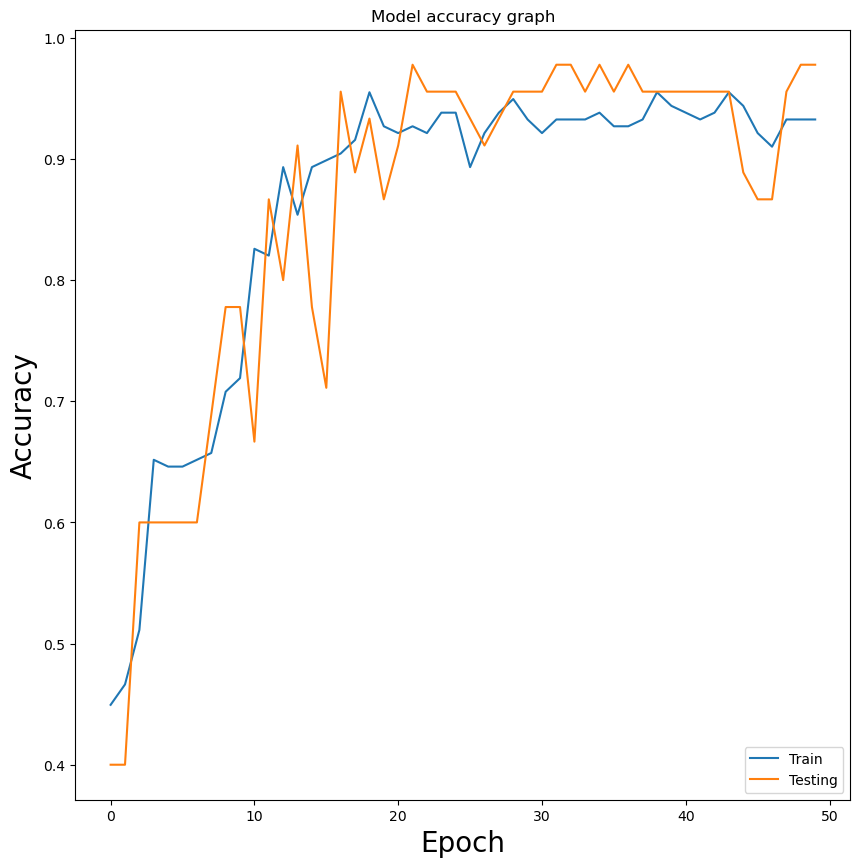

In [114]:
## Printing a graph showing the accuracy changes during the training phase (summarize history for accuracy)

print(history.history.keys())
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy graph')

plt.xlabel('Epoch').set_fontsize('20')
plt.ylabel('Accuracy').set_fontsize('20')

plt.legend(['Train','Testing'], loc= 'lower right')
plt.savefig('Accuracy.png', bbox_inches='tight', pad_inches = 0.1)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


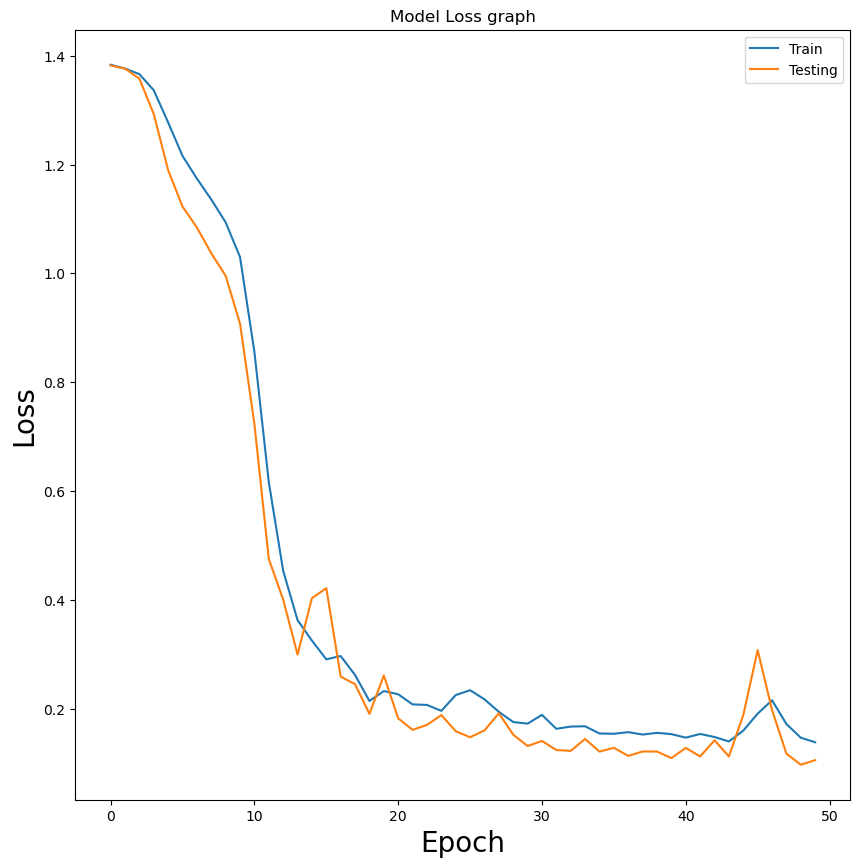

In [120]:
# summarize history for loss
print(history.history.keys())
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss graph')

plt.xlabel('Epoch').set_fontsize('20')
plt.ylabel('Loss').set_fontsize('20')

plt.legend(['Train','Testing'], loc = 'upper right')
plt.savefig('Loss.png', bbox_inches='tight' , pad_inches=0.1)

In [128]:
import numpy as np

In [154]:
model_path = '/Downloads/Nipul_jupiter/ann_model.h5'
classifier.save(model_path)
print(f"Model saved to {model_path}")

Model saved to /Downloads/Nipul_jupiter/ann_model.h5


In [156]:
from keras.models import load_model

model_path = '/Downloads/Nipul_jupiter/ann_model.h5'
loaded_classifier = load_model(model_path)
print("Model loade successfully!")


Model saved successfully!


In [162]:
# Use the loaded model for predict new instance data

new_instance = np.array([[17.975, 15.82929, 75.4319, 99.8291, 29.9876, 23.1296, 203.6253]])

# Make the prediction
prediction = classifier.predict(new_instance)

# If the output layer uses softmax, the result will be probabilities for each class
print("Prediction probabilities:", prediction)

# To get the class with the highest probability
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction probabilities: [[5.4765517e-01 9.4465626e-09 4.5219114e-01 1.5365577e-04]]
Predicted class: [0]
